### Name Prathmesh Patil

# Default on payment

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
%matplotlib inline

## Load and Explore the data

In [3]:
import os

In [4]:
os.chdir('D:')

In [5]:
# Read data file
df = pd.read_csv('default_on_payment.csv')

In [6]:
payment=df

In [7]:
payment.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [8]:
payment.tail()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
4995,104996,A14,12,A32,A42,1736,A61,A74,3,A92,...,31,A143,A152,1,A172,1,A191,A201,0,1
4996,104997,A11,30,A32,A41,3857,A61,A73,4,A91,...,40,A143,A152,1,A174,1,A192,A201,0,1
4997,104998,A14,12,A32,A43,804,A61,A75,4,A93,...,38,A143,A152,1,A173,1,A191,A201,0,1
4998,104999,A11,45,A32,A43,1845,A61,A73,4,A93,...,23,A143,A153,1,A173,1,A192,A201,1,1
4999,105000,A12,45,A34,A41,4576,A62,A71,3,A93,...,27,A143,A152,1,A173,1,A191,A201,0,1


In [9]:
payment.shape

(5000, 23)

In [10]:
payment.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [11]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

## Observations

* There are 5000 rows and 23 columns.
* Columns name have no sapces and special characters.
* There are 13 variable categorical type and 10 variable are numerical type.
* Dependent Variable is "Default_On_Payment"

## Lets us look at missing values

In [12]:
#Check for missimg values 
missing=payment.columns[payment.isnull().any()]
payment[missing].isnull().sum()

Series([], dtype: float64)

In [13]:
# percentage of missing values in column 
missing=df.columns[payment.isnull().any()]
per=payment[missing].isnull().sum()* 100 /len(df)
per.sort_values(ascending=False)

Series([], dtype: float64)

In [14]:
# calculate no_of values (count) of each category in categorical col:
categorical=payment.select_dtypes(include=object).columns.to_list()
for i in categorical:
    print(payment[i].value_counts())
    print("-"*40)

A14    1970
A11    1370
A12    1345
A13     315
Name: Status_Checking_Acc, dtype: int64
----------------------------------------
A32    2650
A34    1465
A33     440
A31     245
A30     200
Name: Credit_History, dtype: int64
----------------------------------------
A43     1400
A40     1170
A42      905
A41      515
A49      485
A46      250
A45      110
A44       60
A410      60
A48       45
Name: Purposre_Credit_Taken, dtype: int64
----------------------------------------
A61    3015
A65     915
A62     515
A63     315
A64     240
Name: Savings_Acc, dtype: int64
----------------------------------------
A73    1695
A75    1265
A74     870
A72     860
A71     310
Name: Years_At_Present_Employment, dtype: int64
----------------------------------------
A93    2740
A92    1550
A94     460
A91     250
Name: Marital_Status_Gender, dtype: int64
----------------------------------------
A101    4535
A103     260
A102     205
Name: Other_Debtors_Guarantors, dtype: int64
-------------------------

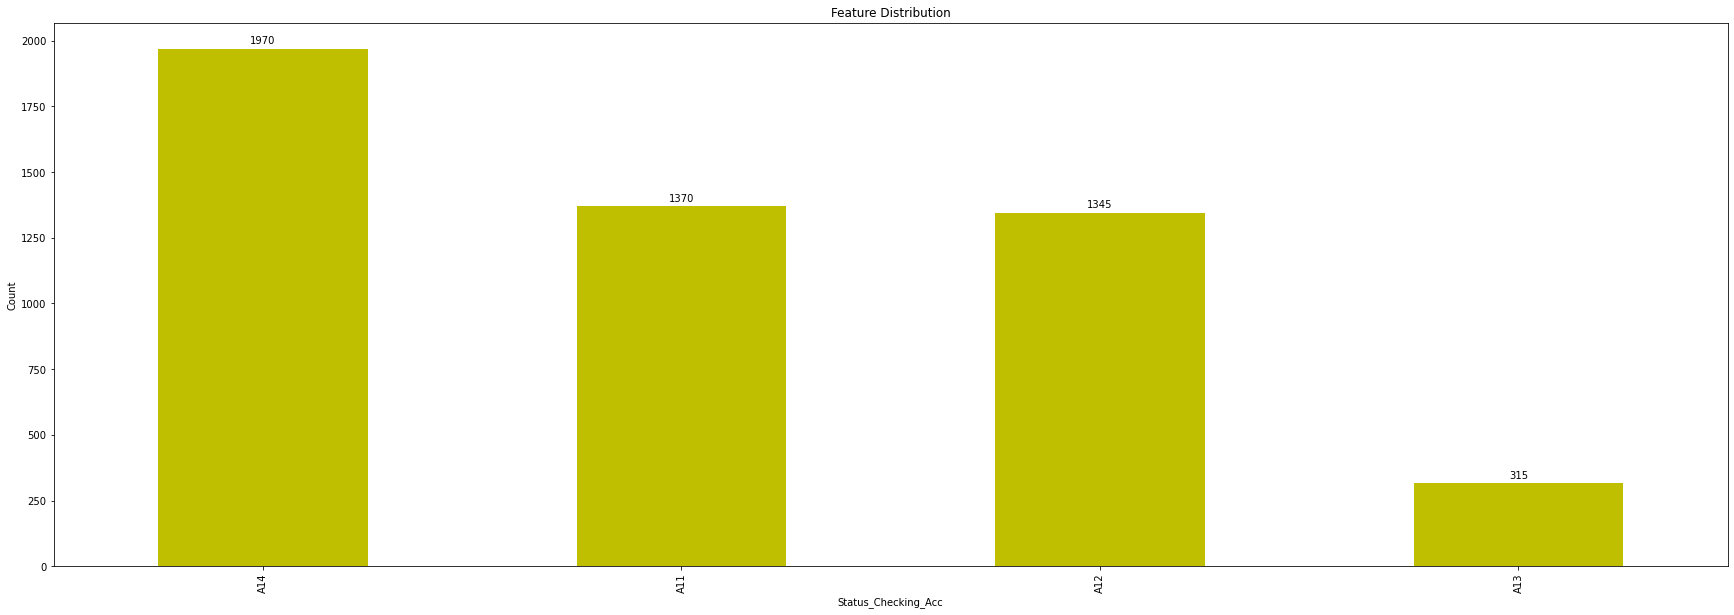

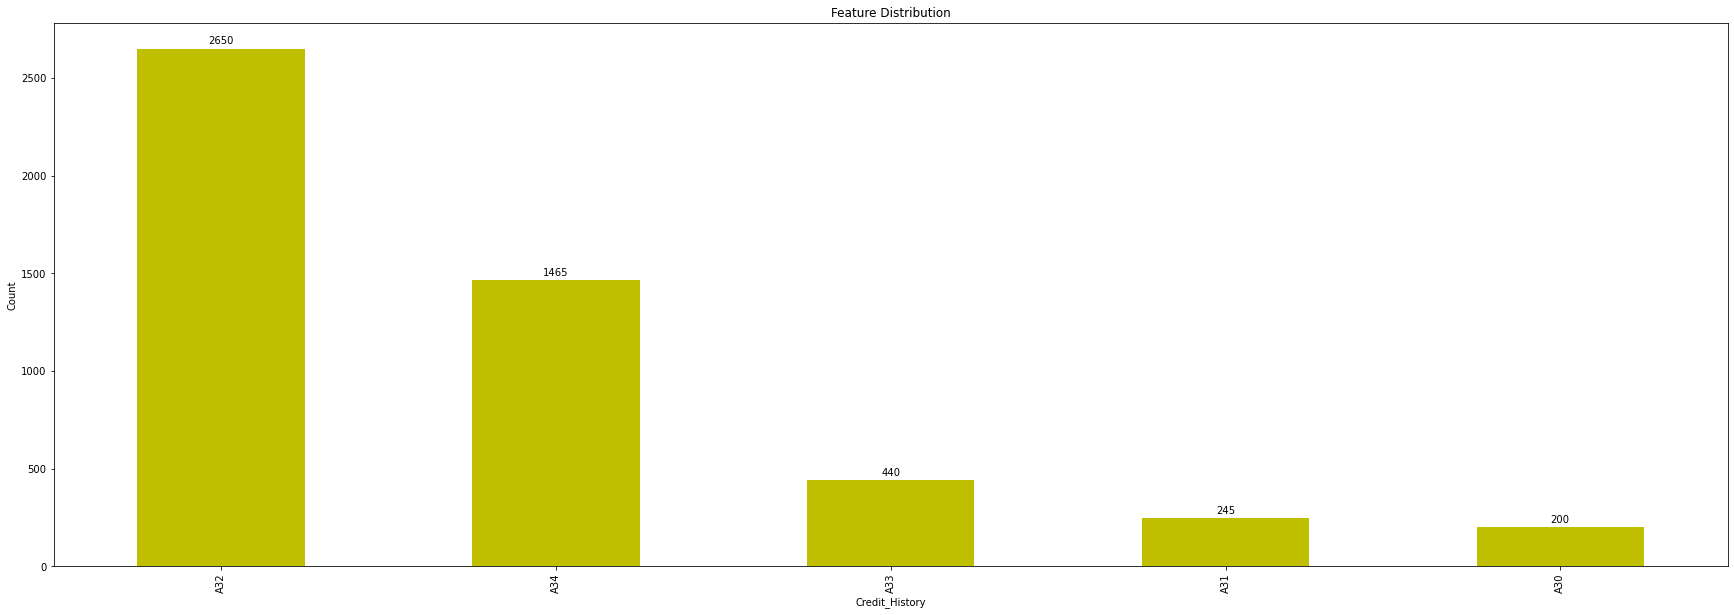

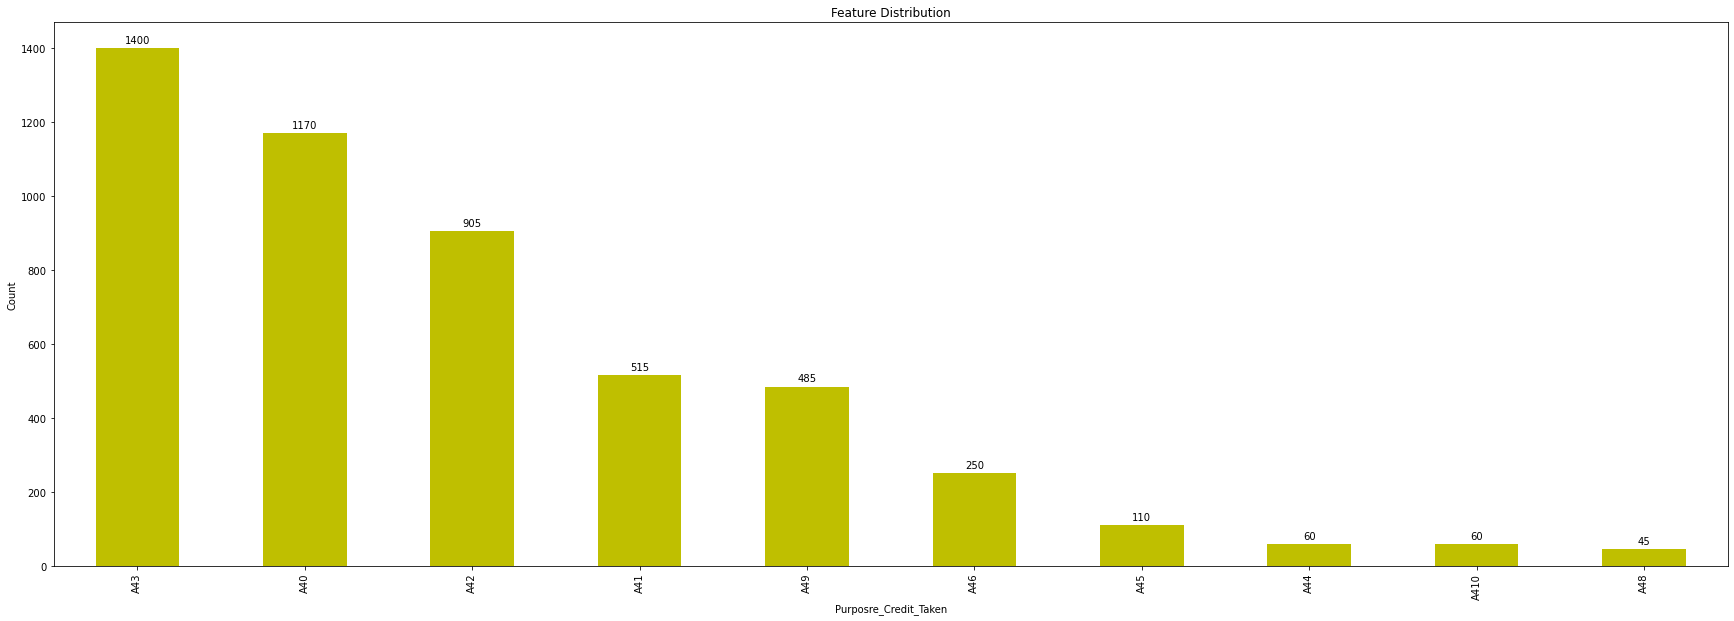

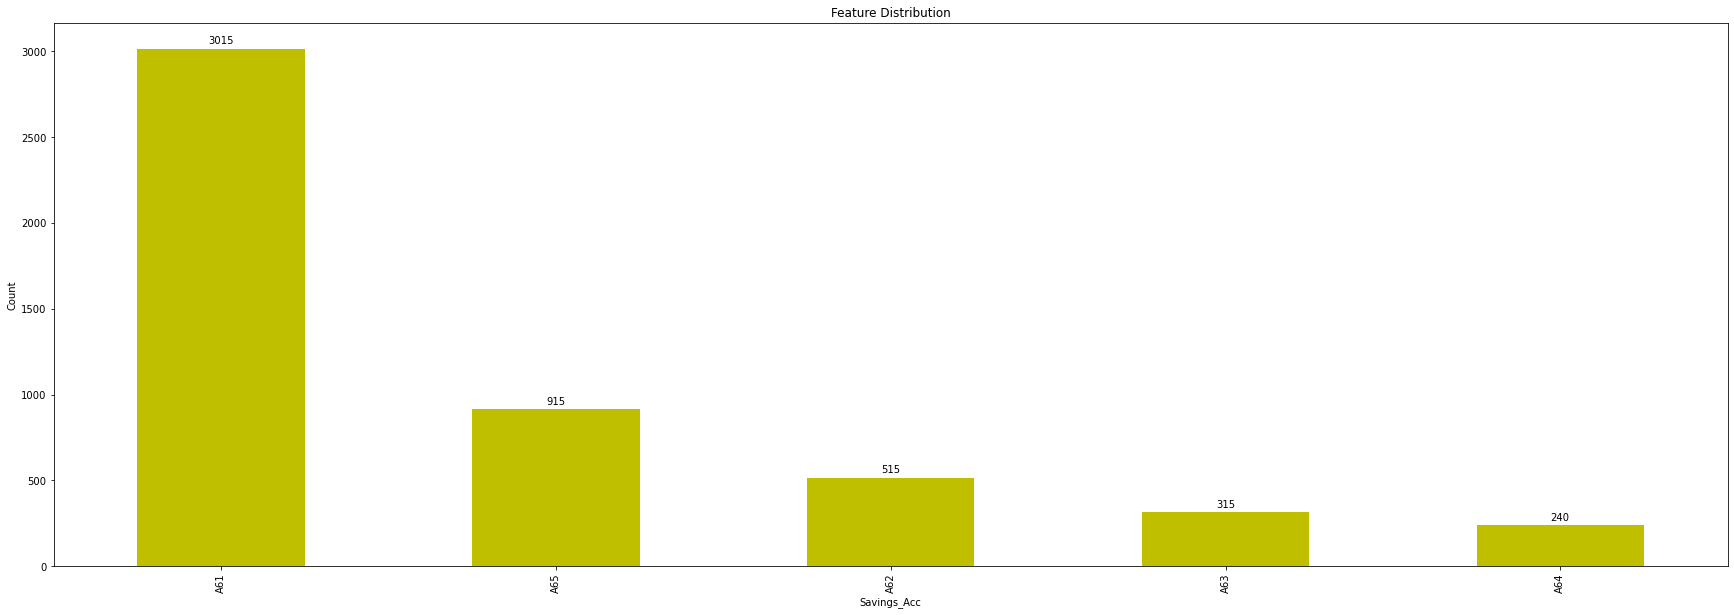

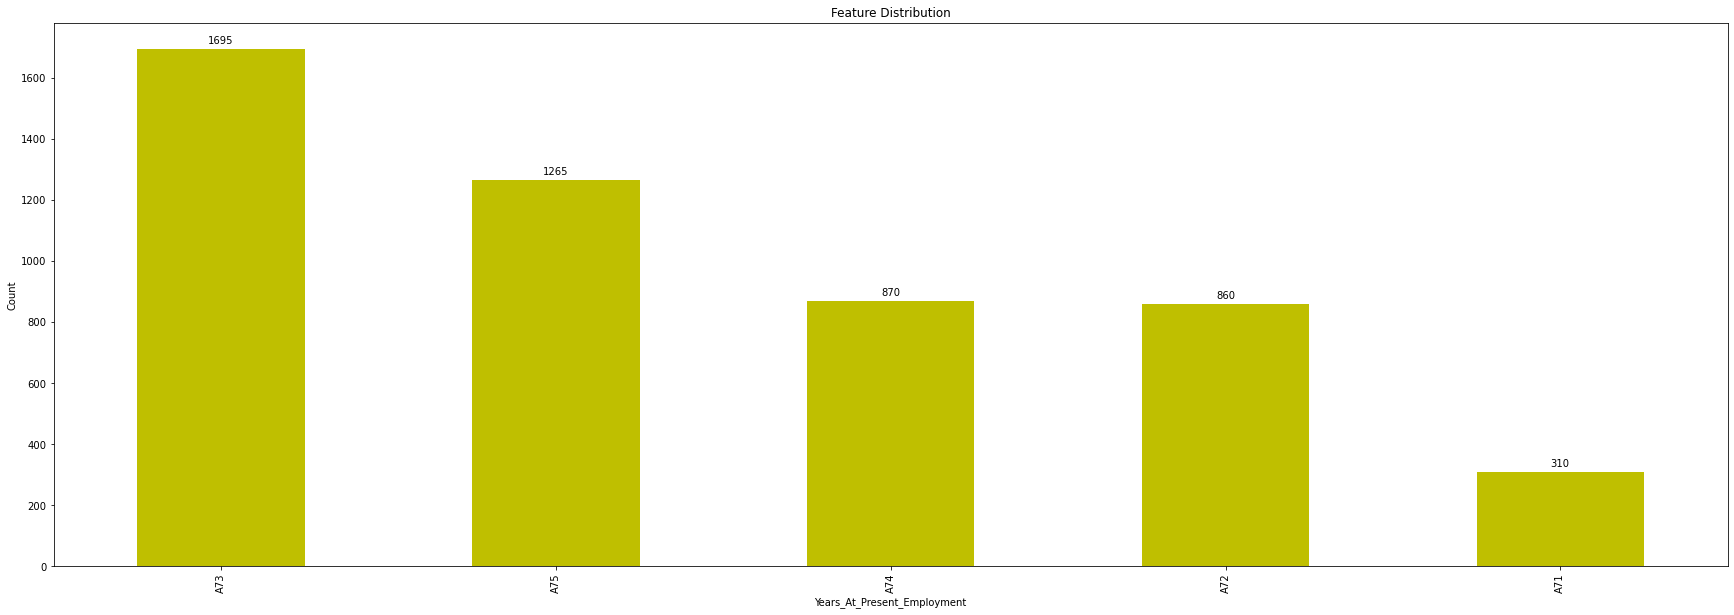

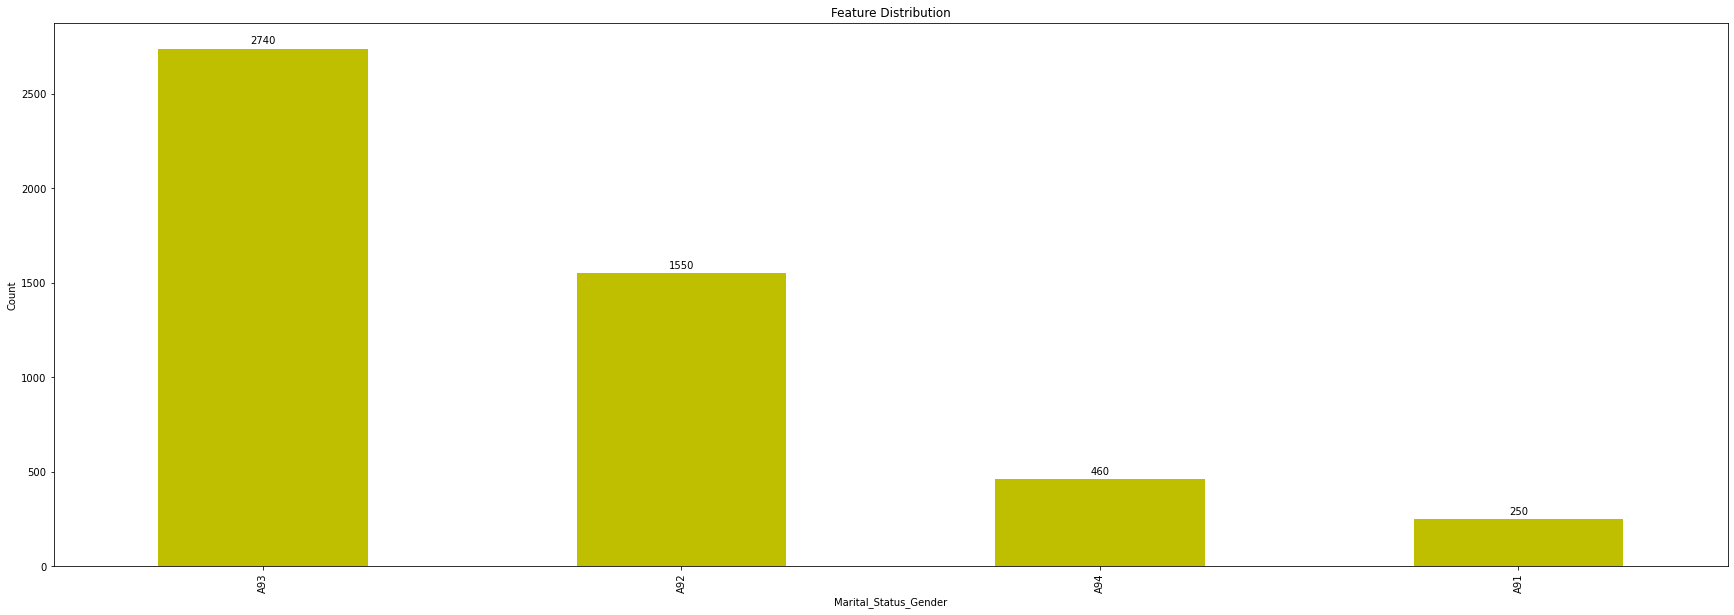

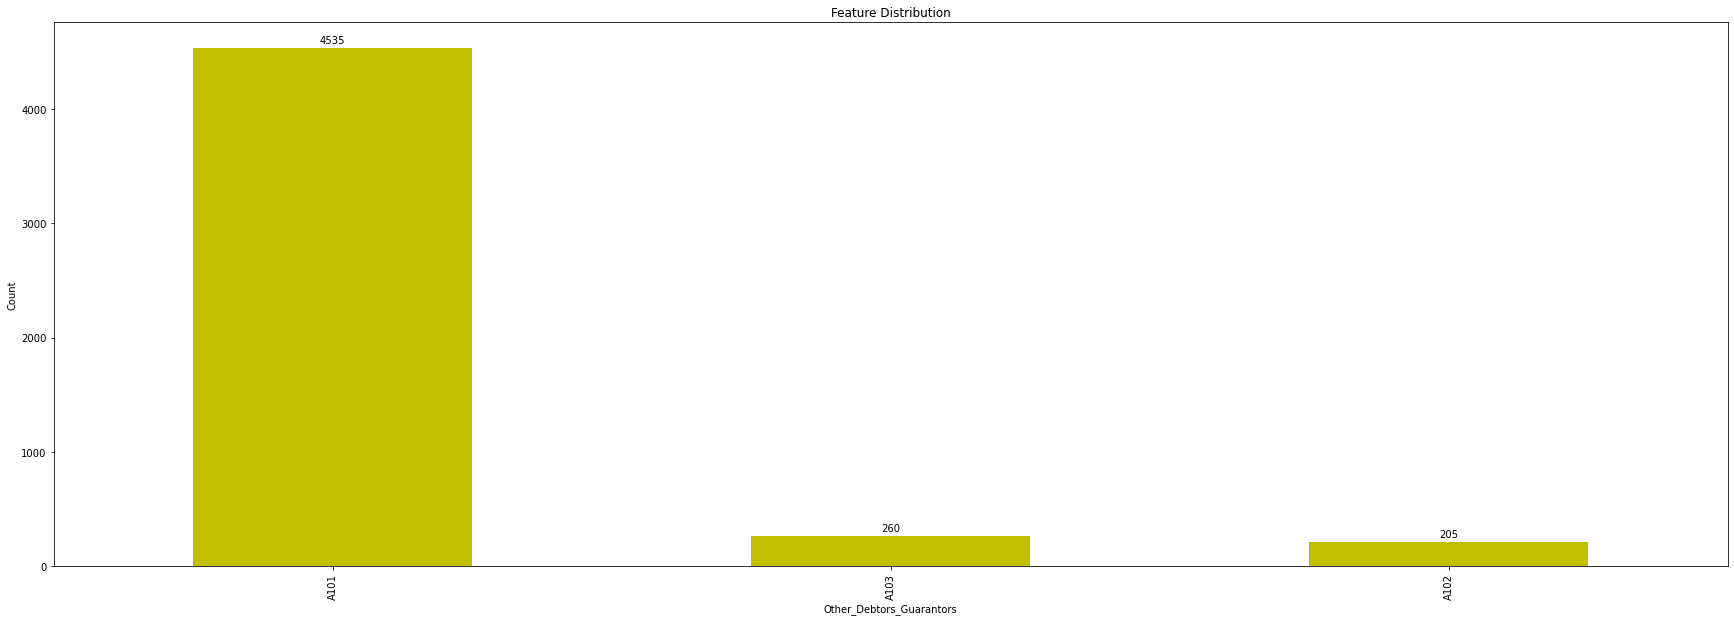

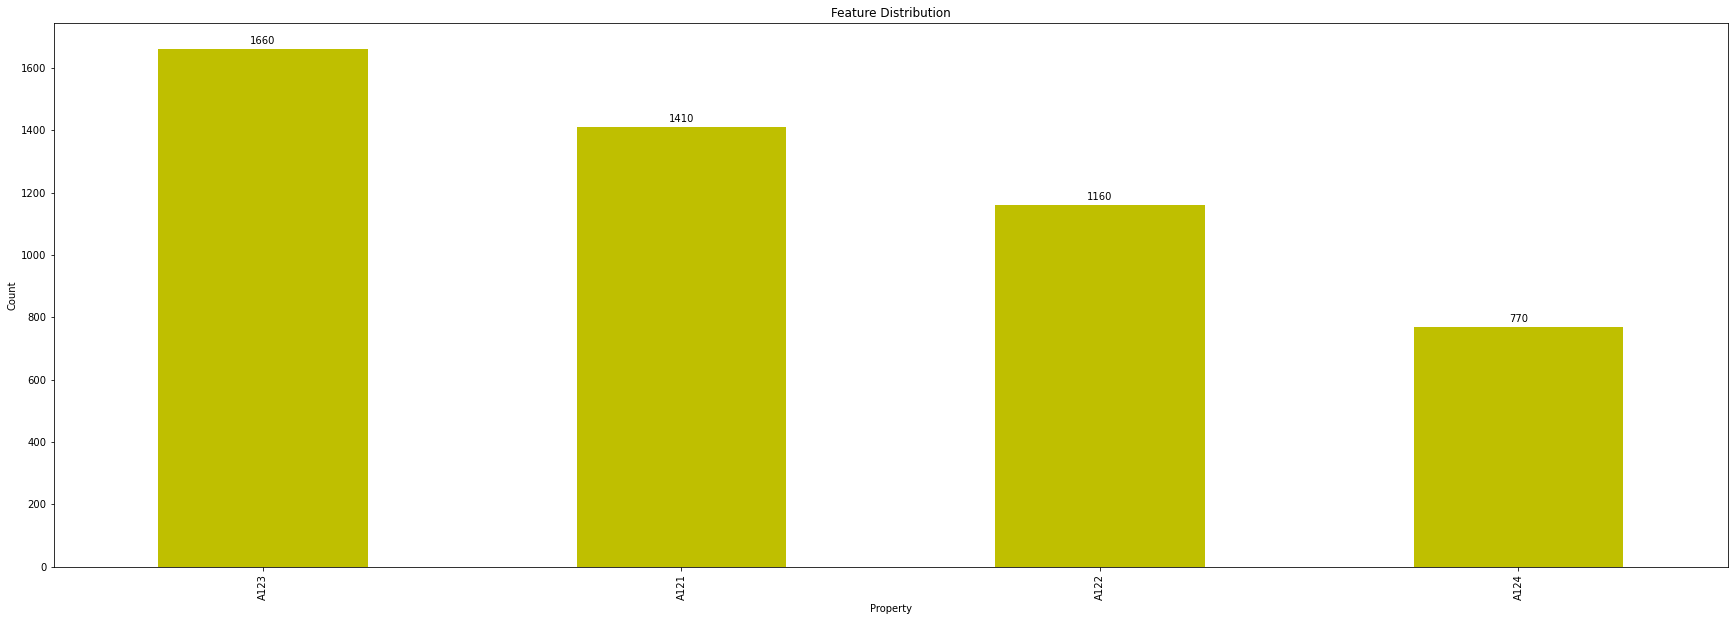

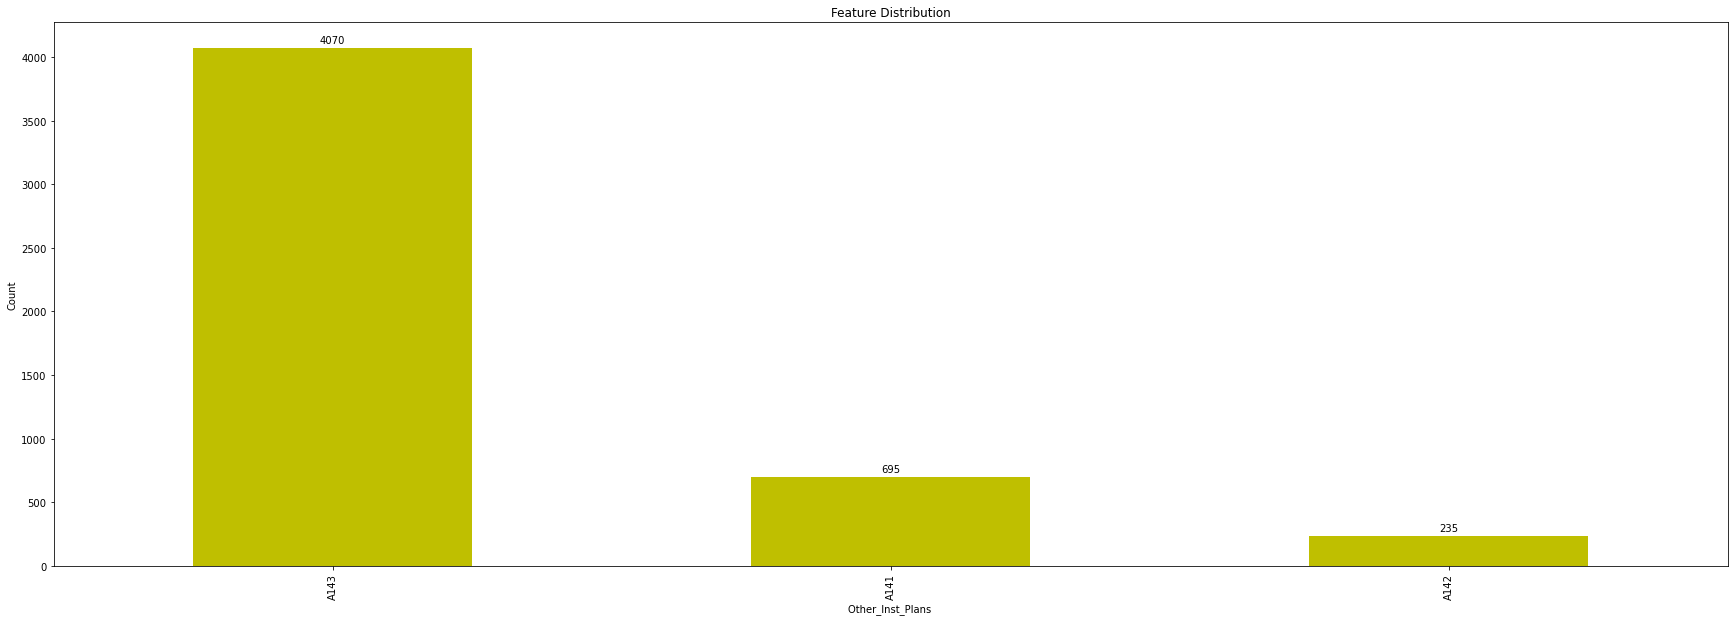

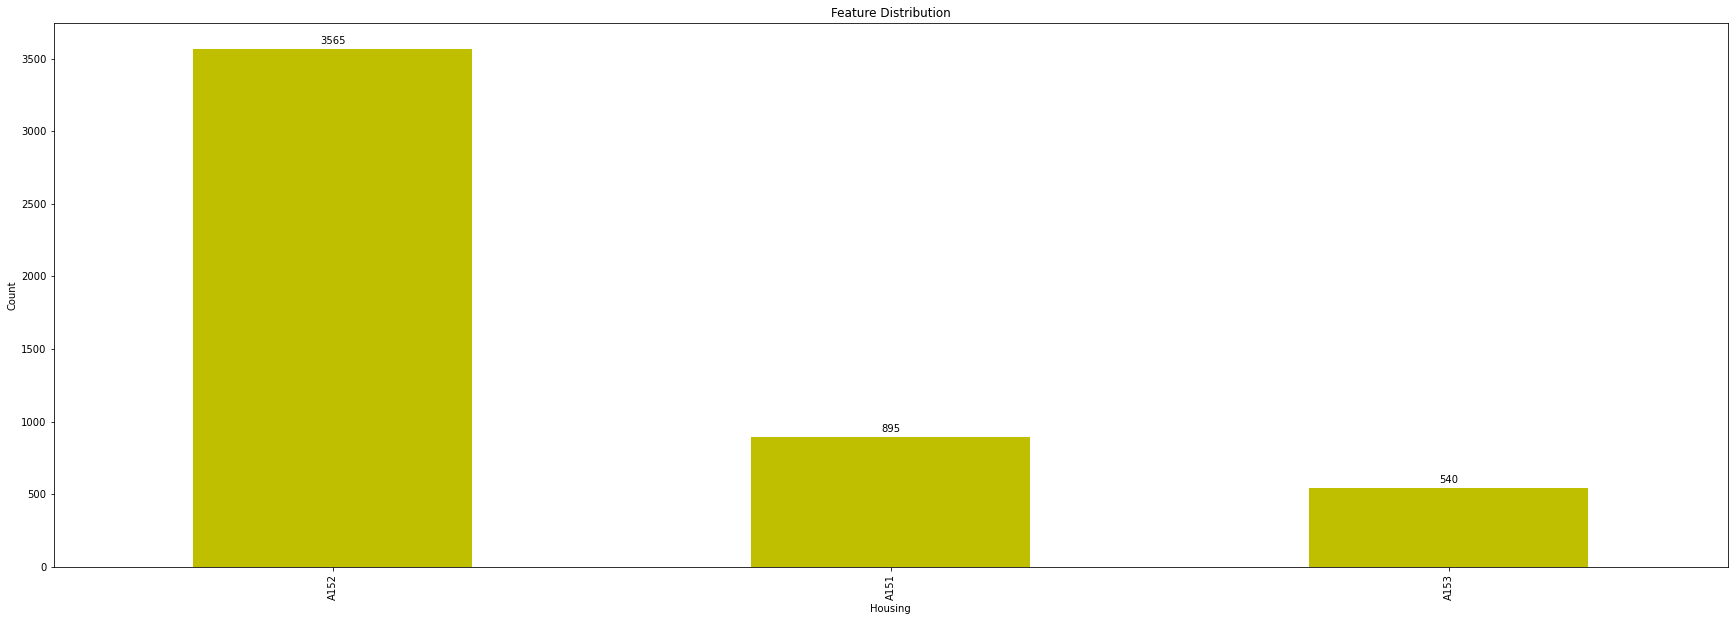

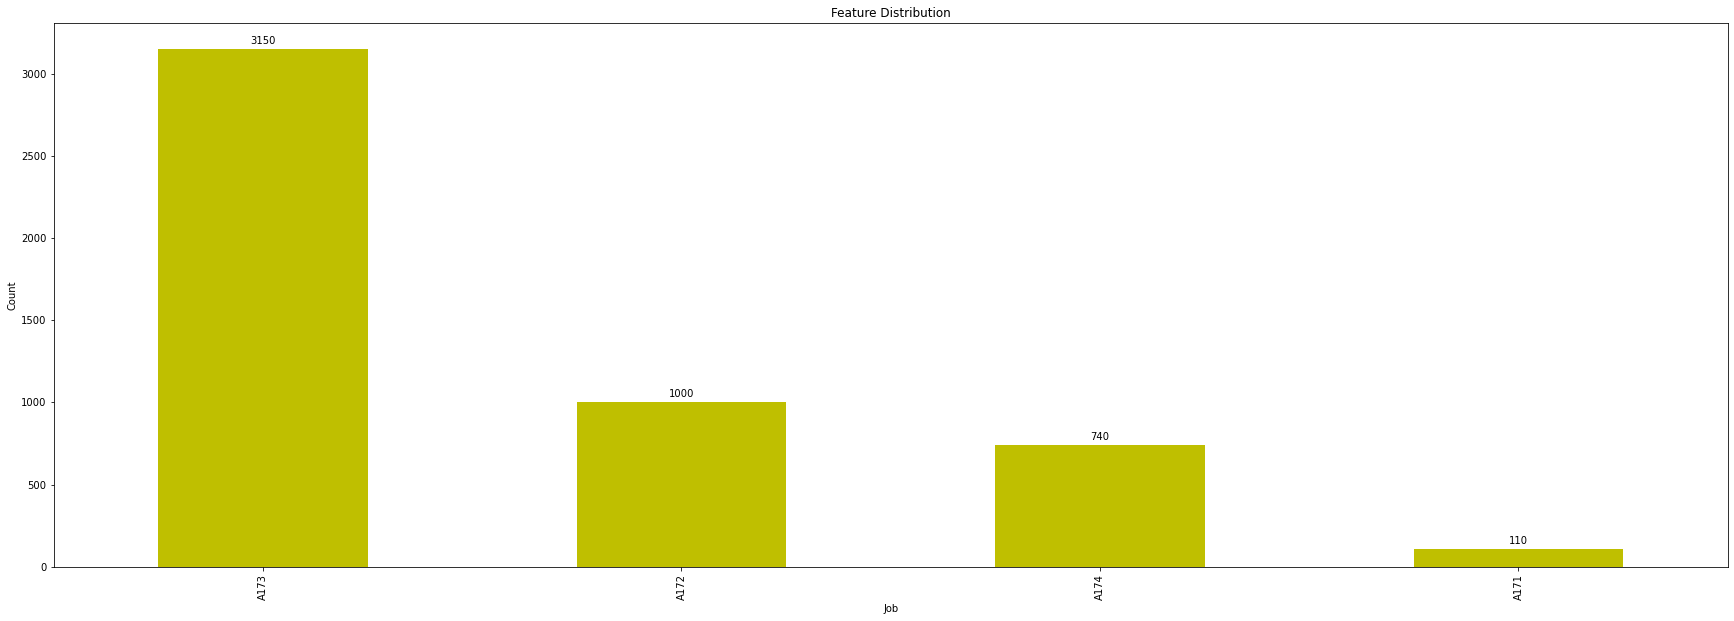

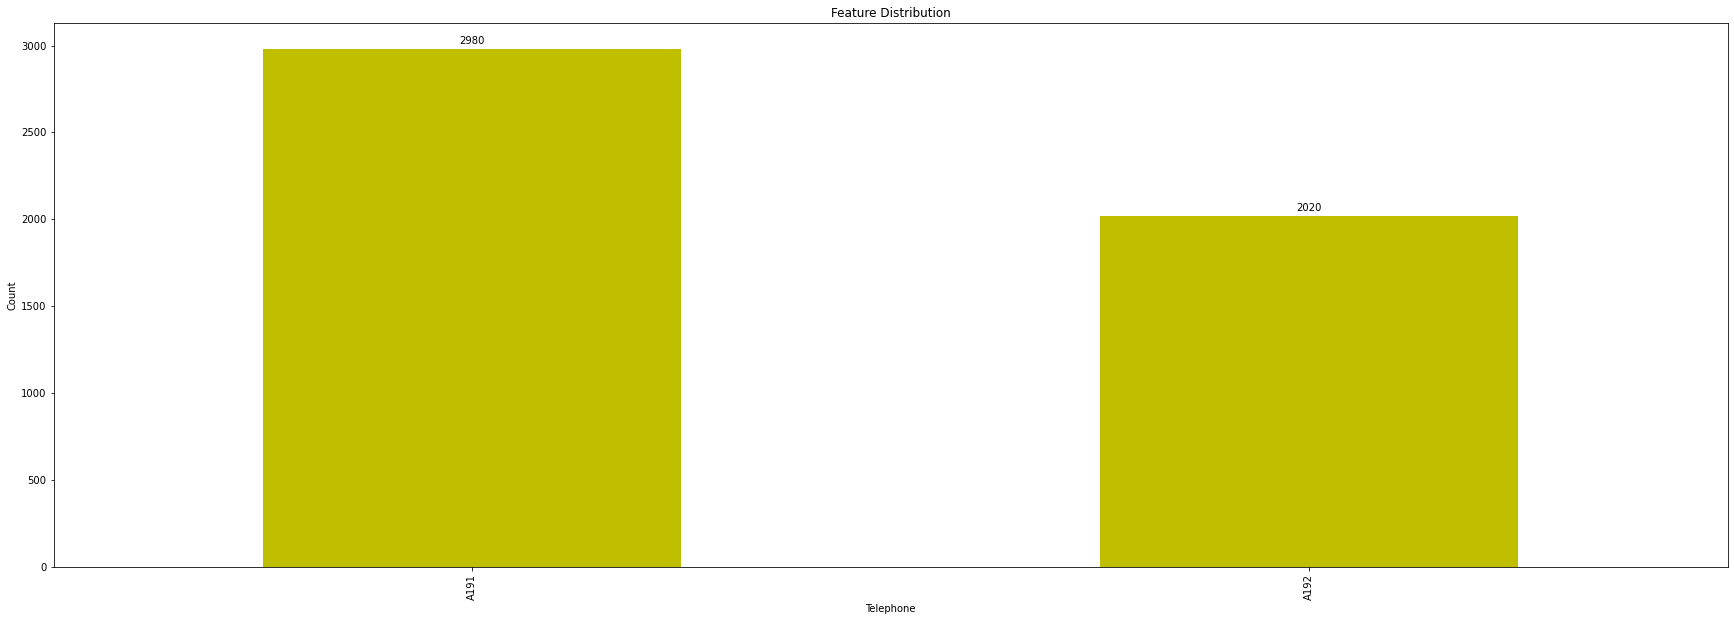

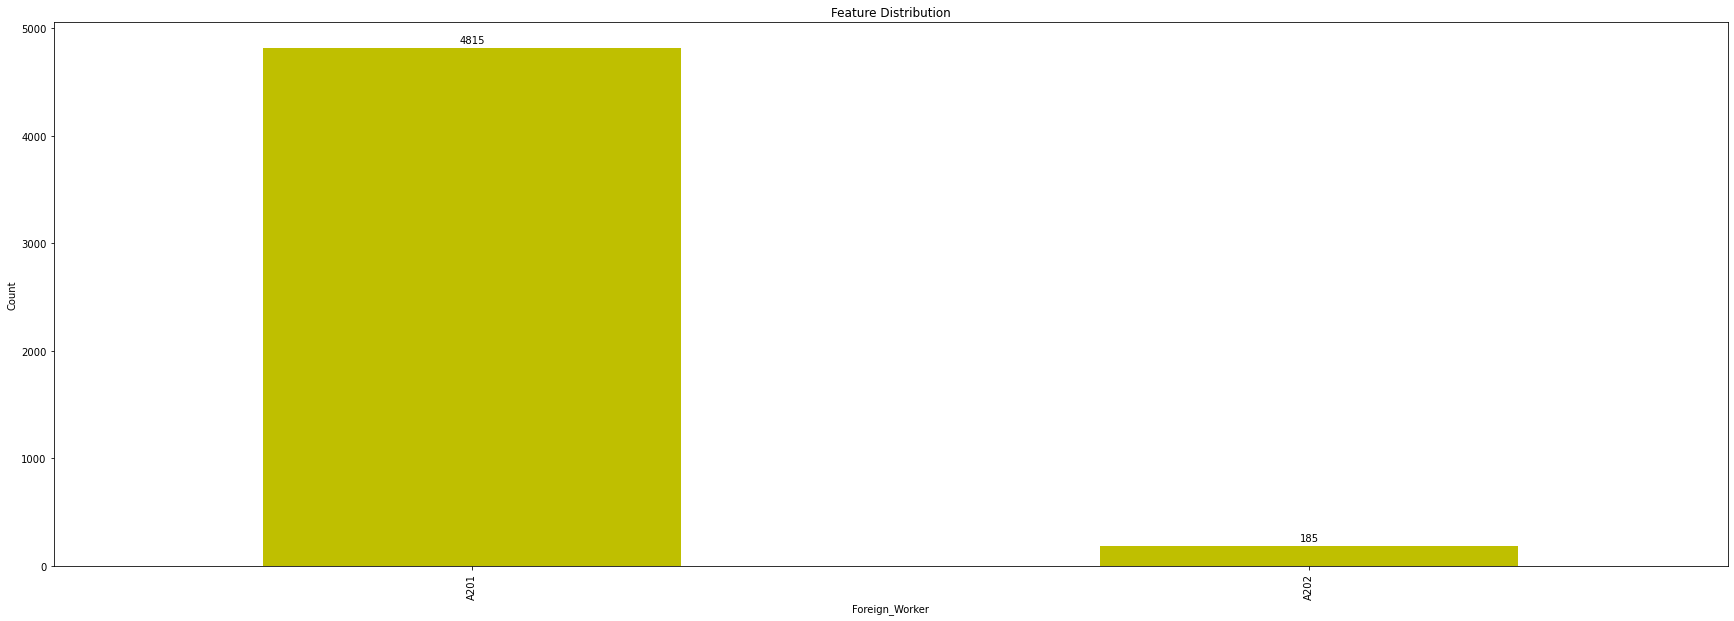

In [15]:
categorical=df.select_dtypes(include=object)
for i ,Feature in enumerate(categorical):
    plt.figure(figsize=(30,10))
    #plt.subplot(13,,i+1)# Species is an categorical data  
    plots=payment[Feature].value_counts().plot(kind='bar',color="y")#to plot graph we have to take count of each Species

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',xytext=(0,8),
                   textcoords='offset points')

    plt.xlabel(Feature) # Species name
    plt.ylabel("Count") #count of Species
    plt.title("Feature Distribution")# title of Graph
    plt.show()

In [16]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [17]:
X=df.drop(['Default_On_Payment'],axis=1)
Y=df[['Default_On_Payment']]

In [18]:
print(X.shape)
print(Y.shape)

(5000, 22)
(5000, 1)


In [19]:
Category_columns=payment.select_dtypes(include=object).columns.tolist()


In [20]:
#categorical=df.select_dtypes(include=object)
X=pd.get_dummies(X,columns=Category_columns,drop_first=True)
X.head()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Count,Status_Checking_Acc_A12,...,Property_A124,Other_Inst_Plans _A142,Other_Inst_Plans _A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
0,100001,6,1169,4,4,67,2,1,1,0,...,0,0,1,1,0,0,1,0,1,0
1,100002,48,5951,2,2,22,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
2,100003,12,2096,2,3,49,1,2,1,0,...,0,0,1,1,0,1,0,0,0,0
3,100004,42,7882,2,4,45,1,2,1,0,...,0,0,1,0,1,0,1,0,0,0
4,100005,24,4870,3,4,53,2,2,1,0,...,1,0,1,0,1,0,1,0,0,0


In [21]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,confusion_matrix,
                             accuracy_score,roc_auc_score,roc_curve,
                             recall_score,precision_score,f1_score)

In [23]:
from sklearn import metrics
from sklearn import datasets

In [24]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [25]:
pred_train=logreg.predict(X_train)
#make_confusion_matrix(Y_train,pred_train)
confusion_matrix(Y_train,pred_train,labels=[1,0])

array([[ 108,  926],
       [  84, 2382]], dtype=int64)

In [26]:
print("Train Recall",recall_score(Y_train,pred_train))
print("Train Precision",precision_score(Y_train,pred_train))
print("Train f1_score:",f1_score(Y_train,pred_train))

Train Recall 0.10444874274661509
Train Precision 0.5625
Train f1_score: 0.1761827079934747


In [27]:
pred_test=logreg.predict(X_test)
confusion_matrix(Y_test,pred_test,labels=[1,0])

array([[ 46, 415],
       [ 41, 998]], dtype=int64)

In [28]:
print("Test Recall",recall_score(Y_test,pred_test))
print("Test Precision",precision_score(Y_test,pred_test))
print("Test f1_score:",f1_score(Y_test,pred_test))

Test Recall 0.09978308026030369
Test Precision 0.5287356321839081
Test f1_score: 0.1678832116788321


# ROC curve for train

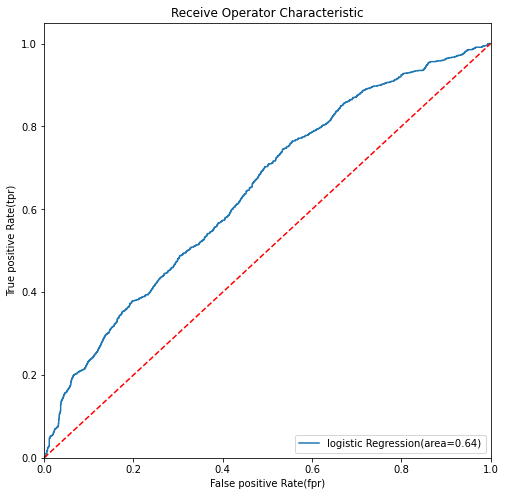

In [29]:
logit_roc_auc=roc_auc_score(Y_train,logreg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(Y_train,logreg.predict_proba(X_train)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label = 'logistic Regression(area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate(fpr)')
plt.ylabel('True positive Rate(tpr)')
plt.title('Receive Operator Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC curve for test

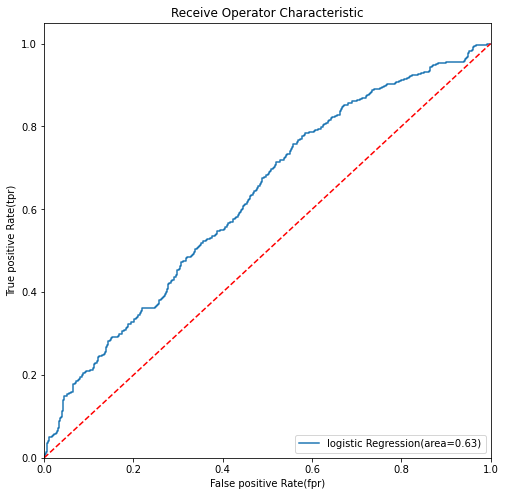

In [30]:
logit_roc_auc=roc_auc_score(Y_test,logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test,logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label = 'logistic Regression(area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate(fpr)')
plt.ylabel('True positive Rate(tpr)')
plt.title('Receive Operator Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Let us now try to find out an optimal cutoff

In [31]:
train_pred_prob=logreg.predict_proba(X_train)[:,1]
train_pred_prob

array([0.44823776, 0.42814255, 0.28578946, ..., 0.22878481, 0.28035579,
       0.36943804])

In [32]:
column_names = ["Cutoff_Prob","TP","FN","TN","FP","P","N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

for cutoff in Cutoff_Prob:
    Y_train["pred_y"] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((Y_train.pred_y == 1), (Y_train.Default_On_Payment == 1)).sum()
    FN = np.logical_and((Y_train.pred_y == 0), (Y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((Y_train.pred_y == 0), (Y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((Y_train.pred_y == 1), (Y_train.Default_On_Payment == 0)).sum()
    P = TP + FN
    N = TN + FP
   
    temp_data = {"Cutoff_Prob": cutoff,
                 "TP": TP,#
                 "FN": FN,
                 "TN": TN,
                 "FP": FP,
                 "P": P,
                 "N": N}
    cutoff_data = cutoff_data.append(temp_data, ignore_index = True)
   
#Dropping  the pred_y column from y_train data
Y_train.drop("pred_y", axis = 1, inplace = True)

In [33]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0
1,0.01,1034.0,0.0,0.0,2466.0,1034.0,2466.0
2,0.02,1034.0,0.0,0.0,2466.0,1034.0,2466.0
3,0.03,1034.0,0.0,0.0,2466.0,1034.0,2466.0
4,0.04,1034.0,0.0,0.0,2466.0,1034.0,2466.0
...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0


In [34]:
#Accuracy
cutoff_data['accuracy']= ((cutoff_data['TP']+cutoff_data['TN'])/(cutoff_data['P']+cutoff_data["N"]))

In [35]:
#sensitivity
cutoff_data['SN']=((cutoff_data['TP'])/(cutoff_data['P']))
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,accuracy,SN
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0
1,0.01,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0
2,0.02,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0
3,0.03,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0
4,0.04,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0
...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0


In [36]:
cutoff_data['Sp']=((cutoff_data['TN'])/(cutoff_data['N']))
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,accuracy,SN,Sp
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0
1,0.01,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0
2,0.02,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0
3,0.03,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0
4,0.04,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0


In [37]:
cutoff_data['Pr']=((cutoff_data['TP'])/(cutoff_data['TP']+cutoff_data['FP']))
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,accuracy,SN,Sp,Pr
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429
1,0.01,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429
2,0.02,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429
3,0.03,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429
4,0.04,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429
...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN


In [38]:
cutoff_data['f1_score']=2*((cutoff_data['SN']*cutoff_data['Pr'])/(cutoff_data['SN']+cutoff_data['Pr']))

cutoff_data['fpr']=(1- cutoff_data['Sp'])

cutoff_data['Ks']=cutoff_data['SN'] - cutoff_data['fpr']

cutoff_data['Dist']= (((1-cutoff_data['SN'])**2)+ ((1-cutoff_data['Sp'])**2)**0.5)

cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,accuracy,SN,Sp,Pr,f1_score,fpr,Ks,Dist
0,0.00,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429,0.456109,1.0,0.0,1.0
1,0.01,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429,0.456109,1.0,0.0,1.0
2,0.02,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429,0.456109,1.0,0.0,1.0
3,0.03,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429,0.456109,1.0,0.0,1.0
4,0.04,1034.0,0.0,0.0,2466.0,1034.0,2466.0,0.295429,1.0,0.0,0.295429,0.456109,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN,NaN,0.0,0.0,1.0
97,0.97,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN,NaN,0.0,0.0,1.0
98,0.98,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN,NaN,0.0,0.0,1.0
99,0.99,0.0,1034.0,2466.0,0.0,1034.0,2466.0,0.704571,0.0,1.0,NaN,NaN,0.0,0.0,1.0


In [39]:
f1_cutoff =cutoff_data['f1_score'].max()
f1_cutoff

0.4930762964974206

In [40]:
Dist_cutoff = cutoff_data['Dist'].min()
Dist_cutoff

0.5683094446037291

In [41]:
Ks_cutoff = cutoff_data['Ks'].max()
Ks_cutoff

0.20381560597432624

### let us check us the result now for the accuracy using different cutoff method

In [42]:
Dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]),"Cutoff_Prob"]
Ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["Ks"]),"Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1_score"]),"Cutoff_Prob"]


In [43]:
print("The Dist cutoff determined is:",Dist_cutoff)
print("The Ks cutoff determined is:",Ks_cutoff)
print("The F1 cutoff determined is:",f1_cutoff)

The Dist cutoff determined is: 0.31
The Ks cutoff determined is: 0.26
The F1 cutoff determined is: 0.22


In [44]:
cutoff=[Dist_cutoff,Ks_cutoff,f1_cutoff]
cutoff

[0.31, 0.26, 0.22]

In [45]:
print("model For Y_train at 0.05 prob")
print("Train Recall",recall_score(Y_train,pred_train))
print("Train Precision",precision_score(Y_train,pred_train))
print("Train f1_score:",f1_score(Y_train,pred_train))
print("Train Accuracy:",accuracy_score(Y_train,pred_train))
print("\n")
print("model For Y_test at 0.05 prob")
print("Test Recall",recall_score(Y_test,pred_test))
print("Test Precision",precision_score(Y_test,pred_test))
print("Test f1_score:",f1_score(Y_test,pred_test))
print("Test Accuracy:",accuracy_score(Y_test,pred_test))
print("\n")

for cutoff in cutoff:
    Y_train_pred=(logreg.predict_proba(X_train)[:,1]>cutoff).astype("int64")
    Y_test_pred=(logreg.predict_proba(X_test)[:,1]>cutoff).astype("int64")
    print("model For Y_train at",cutoff)
    print("Recall train:",recall_score(Y_train,Y_train_pred))
    print("Precision train:",precision_score(Y_train,Y_train_pred))
    print("f1_score train:",f1_score(Y_train,Y_train_pred))
    print("Accuracy train:",accuracy_score(Y_train,Y_train_pred))
    print("model For Y_test at",cutoff)
    print("Recall test:",recall_score(Y_test,Y_test_pred))
    print("Precision test:",precision_score(Y_test,Y_test_pred))
    print("f1_score test:",f1_score(Y_test,Y_test_pred))
    print("Accuracy test:",accuracy_score(Y_test,Y_test_pred))
    print("\n")

model For Y_train at 0.05 prob
Train Recall 0.10444874274661509
Train Precision 0.5625
Train f1_score: 0.1761827079934747
Train Accuracy: 0.7114285714285714


model For Y_test at 0.05 prob
Test Recall 0.09978308026030369
Test Precision 0.5287356321839081
Test f1_score: 0.1678832116788321
Test Accuracy: 0.696


model For Y_train at 0.31
Recall train: 0.488394584139265
Precision train: 0.4004758128469469
f1_score train: 0.4400871459694989
Accuracy train: 0.6328571428571429
model For Y_test at 0.31
Recall test: 0.4945770065075922
Precision test: 0.3951473136915078
f1_score test: 0.4393063583815029
Accuracy test: 0.612


model For Y_train at 0.26
Recall train: 0.730174081237911
Precision train: 0.3677545056015587
f1_score train: 0.4891480401684484
Accuracy train: 0.5494285714285714
model For Y_test at 0.26
Recall test: 0.720173535791757
Precision test: 0.3738738738738739
f1_score test: 0.49221645663454405
Accuracy test: 0.5433333333333333


model For Y_train at 0.22
Recall train: 0.8781431

# Statsmodels

In [46]:
X=sm.add_constant(X,has_constant = 'add')
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)
x_train.shape
x_test.shape
olsmod0=sm.OLS(y_train,x_train)
olsres0=olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:     Default_On_Payment   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     27.57
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          3.80e-208
Time:                        18:03:26   Log-Likelihood:                -1643.4
No. Observations:                3500   AIC:                             3387.
Df Residuals:                    3450   BIC:                             3695.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [47]:
x_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [48]:
# To check Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                               0.000000
Customer_ID                         1.004444
Duration_in_Months                  2.062007
Credit_Amount                       2.557885
Inst_Rt_Income                      1.408093
Current_Address_Yrs                 1.344866
Age                                 1.473696
Num_CC                              1.669992
Dependents                          1.191781
Count                               0.000000
Status_Checking_Acc_A12             1.678402
Status_Checking_Acc_A13             1.250472
Status_Checking_Acc_A14             1.805827
Credit_History_A31                  2.467236
Credit_History_A32                  8.436154
Credit_History_A33                  3.258997
Credit_History_A34                  7.163026
Purposre_Credit_Taken_A41           1.474064
Purposre_Credit_Taken_A410          1.175376
Purposre_Credit_Taken_A42           1.627042
Purposre_Credit_Taken_A43           1.768418
Purposre_Credit_Take

In [49]:
# Creating formula for removing columns which has VIF value > 5

def calculate_vif(X,maxx=5.0):
    variables=list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif=[variance_inflation_factor(X.iloc[:, variables].values, ix)
             for ix in range(X.iloc[:, variables].shape[1])]
       
        maxloc = vif.index(max(vif))
        if max(vif) > maxx:
            print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
           
           
    print("Remaining variables:")
    print(X.columns[variables])
    return X.iloc[:, variables]  

In [50]:
x_train=calculate_vif(x_train)

Dropping 'Job_A173' at index: 47
Dropping 'Credit_History_A32' at index: 14
Dropping 'Marital_Status_Gender_A93' at index: 34
Remaining variables:
Index(['const', 'Customer_ID', 'Duration_in_Months', 'Credit_Amount',
       'Inst_Rt_Income', 'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Count', 'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A33',
       'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64',
       'Savings_Acc_A65', 'Years_At_Present_Employment_A72',
       'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74',
       'Years_At_Present_Employment

In [51]:
# To check Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                              0.000000
Customer_ID                        1.004258
Duration_in_Months                 2.056996
Credit_Amount                      2.546542
Inst_Rt_Income                     1.385408
Current_Address_Yrs                1.336242
Age                                1.461929
Num_CC                             1.580984
Dependents                         1.180448
Count                              0.000000
Status_Checking_Acc_A12            1.673468
Status_Checking_Acc_A13            1.238360
Status_Checking_Acc_A14            1.794814
Credit_History_A31                 1.152741
Credit_History_A33                 1.217449
Credit_History_A34                 1.664497
Purposre_Credit_Taken_A41          1.469400
Purposre_Credit_Taken_A410         1.173622
Purposre_Credit_Taken_A42          1.605045
Purposre_Credit_Taken_A43          1.755690
Purposre_Credit_Taken_A44          1.088139
Purposre_Credit_Taken_A45          1.1043

In [52]:
vif_series1[vif_series1>5].count()

0

In [53]:
# Since all the VIF values are below 5. Lets us now try check for the R2 and adjusted R2
## Significance test
olsmod1 = sm.OLS(Y_train,x_train)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:     Default_On_Payment   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     28.47
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          6.03e-204
Time:                        18:03:30   Log-Likelihood:                -1656.9
No. Observations:                3500   AIC:                             3408.
Df Residuals:                    3453   BIC:                             3697.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
logit=sm.Logit(Y_train,x_train)
lgf=logit.fit()

Optimization terminated successfully.
         Current function value: 0.447588
         Iterations 7


In [55]:
cols=x_train.columns.tolist()
# setting an initial max P-value
max_p_value =1
while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]
    # fitting the model
    model = sm.OLS(Y_train,x_train_aux).fit()  
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_with_p_max= p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
       
    else:
        break
       
       
selected_features = cols
print(selected_features)


['const', 'Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income', 'Age', 'Num_CC', 'Count', 'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A41', 'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42', 'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A46', 'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49', 'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A74', 'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A92', 'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103', 'Property_A124', 'Other_Inst_Plans _A143', 'Housing_A152', 'Housing_A153', 'Telephone_A192', 'Foreign_Worker_A202']


In [56]:
olsmod2=sm.OLS(Y_train,x_train_aux)
olsres2=olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:     Default_On_Payment   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     41.80
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.53e-212
Time:                        18:03:30   Log-Likelihood:                -1664.1
No. Observations:                3500   AIC:                             3392.
Df Residuals:                    3468   BIC:                             3589.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [57]:
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [58]:
logit=sm.Logit(Y_train,x_train)
lgf=logit.fit()

Optimization terminated successfully.
         Current function value: 0.449933
         Iterations 7


In [59]:
print(lgf.summary())

                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3468
Method:                           MLE   Df Model:                           31
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.2587
Time:                        18:03:31   Log-Likelihood:                -1574.8
converged:                       True   LL-Null:                       -2124.3
Covariance Type:            nonrobust   LLR p-value:                3.633e-211
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0521   1.06e+07  -4.89e-09      1.000   -2.09e+07    2.09e+07
Duration_in_Months                  0.0321      0.005      6.533    

In [60]:
pred_train=lgf.predict(x_train)
pred_train=np.round(pred_train) #asscending 0.5 valueto the model as cutoff

In [61]:
pred_test=lgf.predict(x_test)
pred_test=np.round(pred_test)

In [62]:
cm= confusion_matrix(y_train,pred_train,labels=[1,0])         #[1,0          #[TP, FN]
                                                              #0,1]         #[FP, TN]
cm

array([[ 239,  797],
       [ 587, 1877]], dtype=int64)

In [63]:
recall_score(y_train,pred_train)

0.2306949806949807

In [64]:
accuracy_score(y_train,pred_train)

0.6045714285714285

In [65]:
precision_score(y_train,pred_train)

0.28934624697336564

In [66]:
f1_score(y_train,pred_train)

0.25671321160042965

In [67]:
cm= confusion_matrix(y_test,pred_test,labels=[1,0])

cm

array([[255, 206],
       [119, 920]], dtype=int64)

In [68]:
recall_score(y_test,pred_test)

0.5531453362255966

In [69]:
accuracy_score(y_test,pred_test)

0.7833333333333333

In [70]:
precision_score(y_test,pred_test)

0.6818181818181818

In [71]:
f1_score(y_test,pred_test)

0.6107784431137724

In [72]:
train_pred_prob = lgf.predict(x_train)

In [73]:
column_names = ["Cutoff_Prob","TP","FN","TN","FP","P","N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()
    P = TP + FN
    N = TN + FP
   
    temp_data = {"Cutoff_Prob": cutoff,
                 "TP": TP,#
                 "FN": FN,
                 "TN": TN,
                 "FP": FP,
                 "P": P,
                 "N": N}
    cutoff_data = cutoff_data.append(temp_data, ignore_index = True)
   
#Dropping  the pred_y column from y_train data
y_train.drop("pred_y", axis = 1, inplace = True)

In [74]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N
0,0.00,709.0,0.0,0.0,1728.0,709.0,1728.0
1,0.01,709.0,0.0,40.0,1688.0,709.0,1728.0
2,0.02,709.0,0.0,133.0,1595.0,709.0,1728.0
3,0.03,709.0,0.0,215.0,1513.0,709.0,1728.0
4,0.04,708.0,1.0,296.0,1432.0,709.0,1728.0
...,...,...,...,...,...,...,...
96,0.96,2.0,707.0,1728.0,0.0,709.0,1728.0
97,0.97,0.0,709.0,1728.0,0.0,709.0,1728.0
98,0.98,0.0,709.0,1728.0,0.0,709.0,1728.0
99,0.99,0.0,709.0,1728.0,0.0,709.0,1728.0


In [75]:
#Accuracy
cutoff_data['accuracy']= ((cutoff_data['TP']+cutoff_data['TN'])/(cutoff_data['P']+cutoff_data["N"]))

#sensitivity
cutoff_data['SN']=((cutoff_data['TP'])/(cutoff_data['P']))

cutoff_data['Sp']=((cutoff_data['TN'])/(cutoff_data['N']))

cutoff_data['Pr']=((cutoff_data['TP'])/(cutoff_data['TP']+cutoff_data['FP']))

cutoff_data['f1_score']=2*((cutoff_data['SN']*cutoff_data['Pr'])/(cutoff_data['SN']+cutoff_data['Pr']))

cutoff_data['fpr']=(1- cutoff_data['Sp'])

cutoff_data['Ks']=cutoff_data['SN'] - cutoff_data['fpr']

cutoff_data['Dist']= (((1-cutoff_data['SN'])**2)+ ((1-cutoff_data['Sp'])**2)**0.5)



In [76]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,accuracy,SN,Sp,Pr,f1_score,fpr,Ks,Dist
0,0.00,709.0,0.0,0.0,1728.0,709.0,1728.0,0.290931,1.000000,0.000000,0.290931,0.450731,1.000000,0.000000,1.000000
1,0.01,709.0,0.0,40.0,1688.0,709.0,1728.0,0.307345,1.000000,0.023148,0.295786,0.456536,0.976852,0.023148,0.976852
2,0.02,709.0,0.0,133.0,1595.0,709.0,1728.0,0.345507,1.000000,0.076968,0.307726,0.470627,0.923032,0.076968,0.923032
3,0.03,709.0,0.0,215.0,1513.0,709.0,1728.0,0.379155,1.000000,0.124421,0.319082,0.483794,0.875579,0.124421,0.875579
4,0.04,708.0,1.0,296.0,1432.0,709.0,1728.0,0.411982,0.998590,0.171296,0.330841,0.497016,0.828704,0.169886,0.828706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,2.0,707.0,1728.0,0.0,709.0,1728.0,0.709889,0.002821,1.000000,1.000000,0.005626,0.000000,0.002821,0.994366
97,0.97,0.0,709.0,1728.0,0.0,709.0,1728.0,0.709069,0.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000
98,0.98,0.0,709.0,1728.0,0.0,709.0,1728.0,0.709069,0.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000
99,0.99,0.0,709.0,1728.0,0.0,709.0,1728.0,0.709069,0.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000


In [77]:
Dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]),"Cutoff_Prob"]
Ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["Ks"]),"Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1_score"]),"Cutoff_Prob"]


In [78]:
print("The dist cutoff determined is:",Dist_cutoff)
print("The Ks cutoff determined is:",Ks_cutoff)
print("The F1 cutoff determined is:",f1_cutoff)


The dist cutoff determined is: 0.39
The Ks cutoff determined is: 0.23
The F1 cutoff determined is: 0.23


In [79]:
cutoffs= [Dist_cutoff,f1_cutoff,Ks_cutoff]

for cutoff in cutoffs:
    y_train_pred=(lgf.predict(x_train)>cutoff).astype("int64")
    y_test_pred=(lgf.predict(x_test)>cutoff).astype("int64")
    
    print('cutoff ->', cutoff)
    print('accuracy train ->',accuracy_score(y_train,y_train_pred))
    print('recall train ->',recall_score(y_train,y_train_pred))
    print('precision train ->',precision_score(y_train,y_train_pred))
    print('f1 score train ->',f1_score(y_train,y_train_pred))
    print('accuracy test ->',accuracy_score(y_test,y_test_pred))
    print('recall test ->',recall_score(y_test,y_test_pred))
    print('precision test ->',precision_score(y_test,y_test_pred))
    print('f1 score test ->',f1_score(y_test,y_test_pred))  


cutoff -> 0.39
accuracy train -> 0.5708571428571428
recall train -> 0.31756756756756754
precision train -> 0.29270462633451955
f1 score train -> 0.3046296296296296
accuracy test -> 0.7613333333333333
recall test -> 0.6550976138828634
precision test -> 0.6027944111776448
f1 score test -> 0.6278586278586279
cutoff -> 0.23
accuracy train -> 0.5082857142857143
recall train -> 0.4855212355212355
precision train -> 0.29745712596096985
f1 score train -> 0.36890355702236893
accuracy test -> 0.706
recall test -> 0.806941431670282
precision test -> 0.5138121546961326
f1 score test -> 0.6278481012658228
cutoff -> 0.23
accuracy train -> 0.5082857142857143
recall train -> 0.4855212355212355
precision train -> 0.29745712596096985
f1 score train -> 0.36890355702236893
accuracy test -> 0.706
recall test -> 0.806941431670282
precision test -> 0.5138121546961326
f1 score test -> 0.6278481012658228


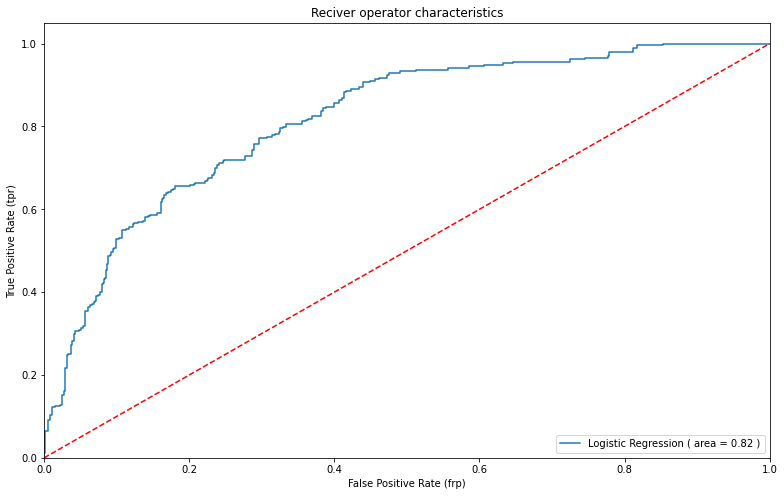

In [80]:
logit_roc_auc = roc_auc_score(y_test, lgf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lgf.predict(x_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression ( area = %0.2f )'% logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (frp)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("Reciver operator characteristics")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [81]:
Observation={"Model Name":["Sklearn(0.5)CutOff","Sklearn(Dist_cut_Off)","Sklearn(KS_cut_off)","Sklearn(F1_cut_off)","StatsModel(0.5)","StatsModel(Dist_cut_Off)","StatsModel(KS_cut_off)","Sklearn(F1_cut_off)"],
                            "Recall Train":[0.10,0.48,0.73,0.87,0.23,0.31,0.48,0.48],
                            "Recall Test":[0.09,0.49,0.72,0.86,0.53,0.65,0.80,0.80],
                            "Precision Train":[0.56,0.40,0.36,0.34,0.28,0.29,0.29,0.29],
                            "Precision Test":[0.52,0.39,0.37,0.34,0.68,0.60,0.51,0.51],
                           "f1_score Train":[0.17,0.44,0.48,0.49,0.25,0.30,0.36,0.36],
                           "f1_score Test":[0.16,0.43,0.49,0.49,0.61,0.62,0.62,0.62],
                           "Accuracy Train":[0.71,0.63,0.54,0.46,0.57,0.50,0.50,0.60],
                           "Accuracy Test":[0.69,0.61,0.54,0.46,0.76,0.70,0.70,0.78]
                           }

In [82]:
Observation=pd.DataFrame(Observation)

In [83]:
Observation

,Model Name,Recall Train,Recall Test,Precision Train,Precision Test,f1_score Train,f1_score Test,Accuracy Train,Accuracy Test
0,Sklearn(0.5)CutOff,0.10,0.09,0.56,0.52,0.17,0.16,0.71,0.69
1,Sklearn(Dist_cut_Off),0.48,0.49,0.40,0.39,0.44,0.43,0.63,0.61
2,Sklearn(KS_cut_off),0.73,0.72,0.36,0.37,0.48,0.49,0.54,0.54
3,Sklearn(F1_cut_off),0.87,0.86,0.34,0.34,0.49,0.49,0.46,0.46
4,StatsModel(0.5),0.23,0.53,0.28,0.68,0.25,0.61,0.57,0.76
5,StatsModel(Dist_cut_Off),0.31,0.65,0.29,0.60,0.30,0.62,0.50,0.70
6,StatsModel(KS_cut_off),0.48,0.80,0.29,0.51,0.36,0.62,0.50,0.70
7,Sklearn(F1_cut_off),0.48,0.80,0.29,0.51,0.36,0.62,0.60,0.78


# Odds ratio

In [84]:
# convert coefficient to odds
odds= np.exp(lgf.params)

#finding the percentage changes
perc_change_odds = (np.exp(lgf.params) - 1)* 100

#removing limit from number of columns to display
pd.set_option("display.max_columns", None)

#adding the odds to a dataFrame
pd.DataFrame({"Odds": odds,"Change_odds": perc_change_odds}, index=x_train.columns)

,Odds,Change_odds
const,0.949266,-5.073406
Duration_in_Months,1.032656,3.265587
Credit_Amount,1.000110,0.010987
Inst_Rt_Income,1.352601,35.260060
Age,0.987036,-1.296394
Num_CC,1.425035,42.503530
Count,0.949266,-5.073351
Status_Checking_Acc_A12,0.662578,-33.742240
Status_Checking_Acc_A13,0.377597,-62.240271
Status_Checking_Acc_A14,0.145936,-85.406363


# Coefficient Interpretation

* Property_A124: Holding all the features constant as 1, unit in Property A124 will increase the odds of getting Default On Payment by 2.036 times or 103.5980 % increase in odds of getting a Default_On_Payment.


* Foreign Worker A202: Holding all the features constant as 1, unit in Foreign Worker A202 will decrease odds of getting Default On Payment by times 0.2396 or 76.0423 % decrease in odds of getting a Default_On_Payment.


* Status Checking Acc A14: Holding all the features constant as 1, unit in Status_Checking Acc A14 will decrease the odds of getting Default On Payment by times 0.1621 or 83.7822 % decrease in odds of getting a Default_On_Payment.


* Property A122: Holding all the features constant as 1, unit in Property A122 will increase the odds of getting Default On Payment by 1.6234 times or 62.3423 % increase in odds of getting a Default_On_Payment.


* Dependents: Holding all the features constant as 1, unit in Dependents will increase the odds of getting Default On Payment by 1.5667 times or 56.6752 % increase in odds of getting a Default_On_Payment.